<a href="https://colab.research.google.com/github/abinayanand7896-cloud/Abinaya_Anand/blob/main/News_topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Classification - BBC News**

**1. Introduction**

In the recent years, there are lot of increase in the amount of text based content published everyday in digital platforms. News websites generate large volume of articles from a wide range of subjects. It is difficult for the readers to quickly find the content based on their interests if there is lot of information available at once.Due to this reason, it is essential to have automated tool for news classification.

**1.1. Business Problem**

It is very important to fiter and categorise the news articles. Manual methods to sort news are no longer effective as there is several limitations.
    

*  It consumes lots of time. Thousands of articles are getting published on daily basis so making the classification manually is unrealistic for modern news platforms.

*   There could be human errors if the categorisation is done manually.

*    For the big volume publishers it requires of lot of human resources which will increase the operational expenses.


**1.2. Project Overview**

To address the above limitations, this project majorly focuses on developing an automated news topic classification sysstem using machine learning techniques. The goal of this project is to classify BBC news articles. By automating the classification, the process will become faster, reliable and scalable to use in the real world.

***Dataset Details***

The project will use the BBC news dataset has the news articles that are classified into five categories such as tech, business, sport, entertainment and politics.

***Kaggle Link:*** https://www.kaggle.com/datasets/jacopoferretti/bbc-articles-dataset/data

**1.3. NLP Task Formulation**


*   **Task:** Multi-class Text Classification
*   **Input:** BBC news article text
*   **Output:** Category label ( tech / business / sport / entertainment / politics)
*   **Evaluation Metrics:** precision, recall, f1-score







**2. Initial Setup**

As an initial step, we will import the required libraries, download the NLTK resources and read the dataset to proceed further.

**2.1. Importing Libraries**

In [ ]:
!pip install -q gensim wordcloud nltk matplotlib scikit-learn pandas joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 44.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import torch
import string
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from tensorflow.keras.models import Sequential
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from gensim.models import Word2Vec
from wordcloud import WordCloud
from transformers import AutoTokenizer, AutoModel
from tqdm.auto import tqdm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


*NLTK resources download*

Natural Language Toolkit(NLTK) was used for doing text processing



*   Stopwords will remove the common words like 'is','a','the', etch which doesnot have any important meaning.

* WordNetLemmatizer reduces the words to its original form.




In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**2.2. Dataset Reading**

In [ ]:
data = pd.read_csv('/content/bbc_news_articles_data.csv')
print("Dataset loaded successfully")

Dataset loaded successfully


**3. Exploratory Data Analysis**

It is very important to understand the data before building any models.

**3.1. Dataset Overview**

In [ ]:
print("Sample data from dataset")
print(data.head())

Sample data from dataset
                                                text    labels  no_sentences  \
0  Ad sales boost Time Warner profit\n\nQuarterly...  business            26   
1  Dollar gains on Greenspan speech\n\nThe dollar...  business            17   
2  Yukos unit buyer faces loan claim\n\nThe owner...  business            14   
3  High fuel prices hit BA's profits\n\nBritish A...  business            24   
4  Pernod takeover talk lifts Domecq\n\nShares in...  business            17   

   Flesch Reading Ease Score  Dale-Chall Readability Score  \
0                      62.17                          9.72   
1                      65.56                          9.09   
2                      69.21                          9.66   
3                      62.98                          9.86   
4                      70.63                         10.23   

                                   text_rank_summary  \
0  It hopes to increase subscribers by offering t...   
1  The do

In [ ]:
print("Dataset Information")
print(data.info())

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   text                          2127 non-null   object 
 1   labels                        2127 non-null   object 
 2   no_sentences                  2127 non-null   int64  
 3   Flesch Reading Ease Score     2127 non-null   float64
 4   Dale-Chall Readability Score  2127 non-null   float64
 5   text_rank_summary             2127 non-null   object 
 6   lsa_summary                   2127 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 116.4+ KB
None


In [ ]:
print("Shape of the dataset")
print(data.shape)

Shape of the dataset
(2127, 7)


**3.2. Null value Checks**

In [ ]:
print(data.isnull().sum())

text                            0
labels                          0
no_sentences                    0
Flesch Reading Ease Score       0
Dale-Chall Readability Score    0
text_rank_summary               0
lsa_summary                     0
dtype: int64


**3.3. Visualizing class Distribution**

Class Distribution
labels
sport            505
business         503
politics         403
entertainment    369
tech             347
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

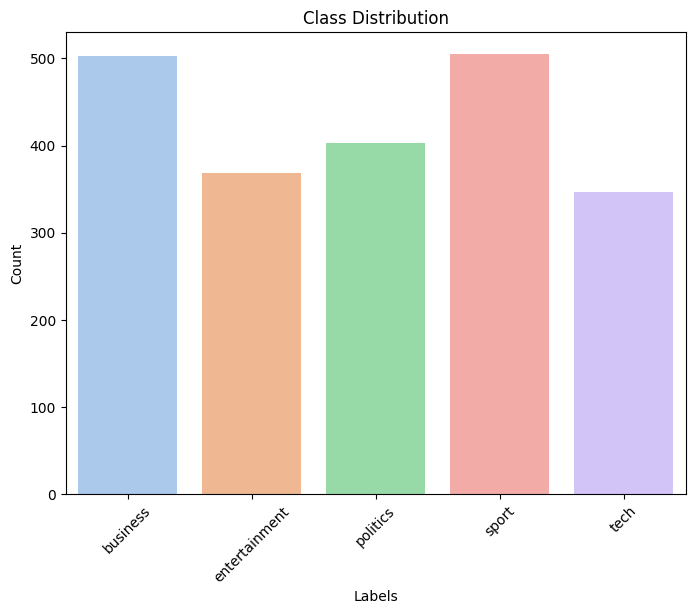

In [ ]:
print("Class Distribution")
print(data['labels'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='labels', hue='labels', data=data, palette= 'pastel', legend = False)
plt.title('Class Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show


**3.4. Word Cloud**

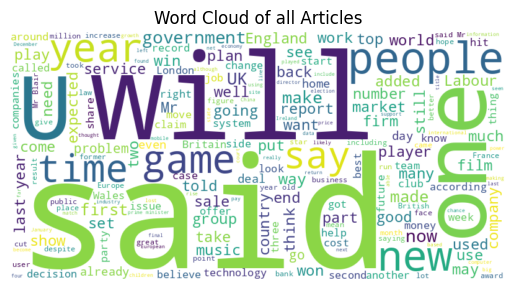

In [ ]:
all_text = ' '.join(data['text'].tolist())
wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of all Articles')
plt.show()

**4. Text Preprocessing**

In Natural Language Processing, it is always necessary to prepare the raw test data for machine learning models.

**4.1. Importing Stopwords and Lemmatizer**

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

**4.2. Defining preprocessing function**

We are going to define a function called preprocess_text() to treat the raw text. It will remove the non-alpha characters. We are also making all the text to lowercase, splitting it into tokens and doing lemmatize where all words are treated as their base form despite of the grammatical variants.


In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

**4.3. Apply Preprocessing**

In this step, the preprocess_text() is called to apply it in the text columns. The cleaned text will be stored in the new column 'clean_text'.


In [ ]:
data['clean_text'] = data['text'].apply(preprocess_text).str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

In [ ]:
print("\n Cleaned Dataset")
display(data.head())


 Cleaned Dataset


,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary,clean_text
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...,ad sale boost time warner profit quarterly pro...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san...",dollar gain greenspan speech dollar hit highes...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...,yukos unit buyer face loan claim owner embattl...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ...",high fuel price hit ba profit british airway b...
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...,pernod takeover talk lift domecq share uk drin...


Now, we will verify that if there is any changes in the dataset structure after preprocessing. There will be a extra column  for clean_text and no changes in the length of the data.

In [ ]:
print("\n shape of the dataset after cleaning: ", data.shape)


 shape of the dataset after cleaning:  (2127, 8)


**5. Data Splitting**

After the text preprocessing, we are going to split the dataset into train and test with 80% of data for training and 20% of data for testing.

Then clean_text column is selected as the input feature(x) and the labels column is chosen as the target variable(y).


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data['clean_text'], data['labels'], test_size=0.2, random_state=42)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (1701,)
y_train: (1701,)
x_test: (426,)
y_test: (426,)


**5.1. Encoding categorical variable:**

The categorical target variable is converted to numerical feature so that the machine learning models can understand.

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded  = le.transform(y_test)


**6. Text Representation**

**6.1. TF/IDF Vectorizer**

TF-IDF is used to evaluate how much important a word is to the document in a corpus. It converts each document into vector of the important scores.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000)

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

The code above starts a TfidfVectorizer to fit on the training text data and learn it's vocabulary and IDF values and then it also transforms the test text data into it's feature vectors.

**6.2.Word2Vec Embedding**

Word2Vec is a group of models which generate the dense word embeddings by learning the relatioships of the words in corpus. We have tokenized the clean_text . doc_vec function was used to find the average of all word vectors in every document by creating a single feature vector. This document level vector form the input features for the training and test datasets.


In [ ]:
def tokenize_text(text):
    return [w for w in word_tokenize(text.lower()) if w not in stop_words and w.isalpha()]

nltk.download('punkt_tab')

x_tokenized_train = x_train.apply(tokenize_text)
x_tokenized_test = x_test.apply(tokenize_text)

w2v_model = Word2Vec(sentences=x_tokenized_train, vector_size=100, window=5, min_count=1, workers=4)


def get_avg_w2v(tokens, model, k=100):
    vec = np.zeros(k)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count != 0:
        vec /= count
    return vec

x_train_w2v = np.array([get_avg_w2v(tokens, w2v_model) for tokens in x_tokenized_train])
x_test_w2v = np.array([get_avg_w2v(tokens, w2v_model) for tokens in x_tokenized_test])



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


The above code for Word2Vec model is using the tokenized train data to get vector representations for the words. It also transforms earch article into an average vector by averaging the word embeddings, generating fixed size feature vectors for training and testing datasets.

**6.3.BERT Representation- Feature Extraction**

BERT provides the contextual embeddings. Instead of counting or averaging the words, we used a pretrained model that could read the whole sentence. We are using the feature extractor to get the dense vector representation.

In [ ]:
from sentence_transformers import SentenceTransformer

model_st = SentenceTransformer('all-MiniLM-L6-v2')

x_train_bert = model_st.encode(x_train.tolist(), batch_size=32, show_progress_bar=True)
x_test_bert  = model_st.encode(x_test.tolist(),  batch_size=32, show_progress_bar=True)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/54 [00:00<?, ?it/s]

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

**7. Model Training**


In [ ]:
#TF-IDF with Logistic Regression

tfidf_log_reg = LogisticRegression()
tfidf_log_reg.fit(x_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Word2Vec with LinearSVC

w2v_svc_model = LinearSVC()
w2v_svc_model.fit(x_train_w2v, y_train)

LinearSVC()

In [ ]:
#BERT with Random Forest

bert_model = RandomForestClassifier(n_estimators=100, random_state=42)
bert_model.fit(x_train_bert,y_train)

RandomForestClassifier(random_state=42)

**7. Model Evaluation**

Now we will evaluate all the three models on the test dataset with accuracy, precision, recall , f1-score metrics.

In [ ]:
y_pred_tfidf = tfidf_log_reg.predict(x_test_tfidf)
y_pred_w2v   = w2v_svc_model.predict(x_test_w2v)
y_pred_bert  = bert_model.predict(x_test_bert)

In [ ]:
print("TF-IDF Results")
print(classification_report(y_test, y_pred_tfidf))

print("Word2Vec Results")
print(classification_report(y_test, y_pred_w2v))

print("BERT Results")
print(classification_report(y_test, y_pred_bert))

TF-IDF Results
               precision    recall  f1-score   support

     business       0.99      0.98      0.99       104
entertainment       0.99      0.94      0.96        78
     politics       0.96      1.00      0.98        73
        sport       0.99      1.00      0.99        98
         tech       0.97      0.99      0.98        73

     accuracy                           0.98       426
    macro avg       0.98      0.98      0.98       426
 weighted avg       0.98      0.98      0.98       426

Word2Vec Results
               precision    recall  f1-score   support

     business       0.98      0.91      0.95       104
entertainment       0.92      0.83      0.87        78
     politics       0.88      0.99      0.93        73
        sport       0.97      0.97      0.97        98
         tech       0.88      0.95      0.91        73

     accuracy                           0.93       426
    macro avg       0.93      0.93      0.93       426
 weighted avg       0.93    

**8. Model Comparison**


In the section, we are going to compare the results of three models that we have trained and evaluated. By comparing the results, we will know which is the best model for this dataset.






In [ ]:
comparison_data = pd.DataFrame({
    "Model": ["TF-IDF + LR", "Word2Vec + LinearSVC", "BERT + RF"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_tfidf),
        accuracy_score(y_test, y_pred_w2v),
        accuracy_score(y_test, y_pred_bert)
    ],
    "Precision": [
        precision_score(y_test, y_pred_tfidf, average = "macro"),
        precision_score(y_test, y_pred_w2v, average = "macro"),
        precision_score(y_test, y_pred_bert, average = "macro")
    ],
    "Recall": [
        recall_score(y_test, y_pred_tfidf, average = "macro"),
        recall_score(y_test, y_pred_w2v, average = "macro"),
        recall_score(y_test, y_pred_bert, average = "macro")
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_tfidf, average = "macro"),
        f1_score(y_test, y_pred_w2v, average = "macro"),
        f1_score(y_test, y_pred_bert, average = "macro")
    ]
})

comparison_data

,Model,Accuracy,Precision,Recall,F1 Score
0,TF-IDF + LR,0.981221,0.980035,0.980594,0.980083
1,Word2Vec + LinearSVC,0.929577,0.925385,0.929538,0.926017
2,BERT + RF,0.964789,0.964881,0.963690,0.964071


*   TF-IDF + Logistic Regression achieved the overall highest performance with 98% and in all other metrics as well.

*   Word2Vec based model have acheived a lower accuracy of 93% comparing it to the rest of the models.

*   The BERT based representation with random forest classfier have given the accuracy of 96%


Overall, the TF-IDF vectorization with Logistic Regression is the best model for this news article topic classification dataset.

**9. Conclusion**

The comparison of all the three models demonstrates that traditional methods like TF-IDF can achieve highest performance on the structured classification tasks.

*Strengths:*



*   The pipeline has gone through three different text representation methods and done thorough assessment.

*   Text preprocessing like cleaning the text, tokenization have helped to improve the model performance and maintain consistency in all the approaches.



*Limitations:*



*   BERT was used as feature extractor instead of fine-tuning due to the computation constraints.

*   This dataset has only English news articles from the single source. This findings can't be generalized and used for other languages.




